# HELP International NGO

## Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## I. IMPORTING LIBRARIES AND UNDERSTANDING DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#read countries data to form a dataframe
dataset = pd.read_csv('Country-data.csv')
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#check the shape of the df
dataset.shape

(167, 10)

In [4]:
#check for null values
dataset.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
#check datatype of the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


As columns in the dataset such as exports, health and imports are given as percentages of GDP column, we would like to convert this data into actual numeric values.

In [6]:
#converting exports, health and imports columns from percentage of GDP to numeric quantites
dataset['exports'] = (dataset['exports'] * dataset['gdpp'])/100
dataset['health'] = (dataset['health'] * dataset['gdpp'])/100
dataset['imports'] = (dataset['imports'] * dataset['gdpp'])/100
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## II. EXPLORATORY DATA ANALYSIS

In [7]:
#choosing style type for plot display
plt.style.use('seaborn-darkgrid')

In [8]:
columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

In [9]:
titles = ['Child Mortality', 'Exports', 'Health', 'Imports', 'Income',
       'Inflation', 'Life Expectancy', 'Total Fertility', 'GDP']

#### Univariate Analysis

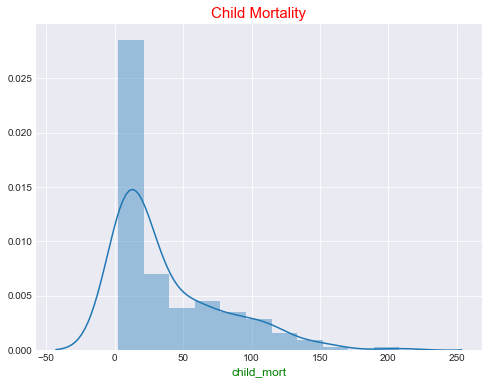

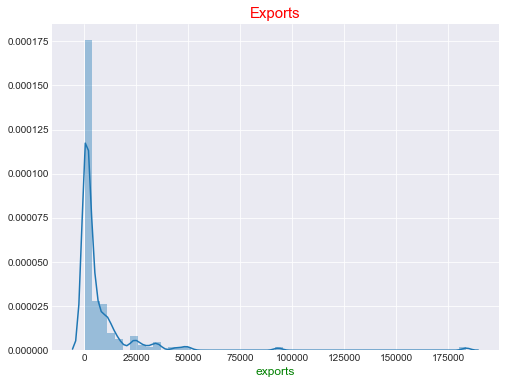

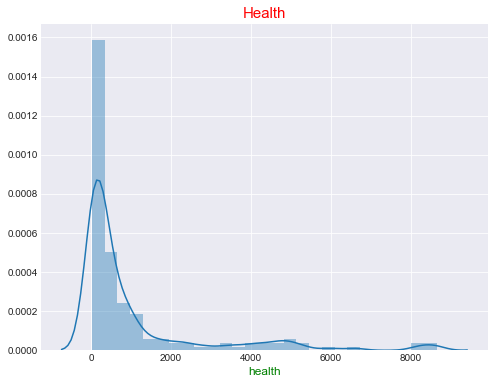

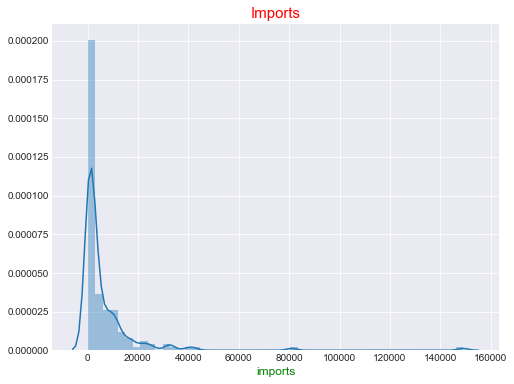

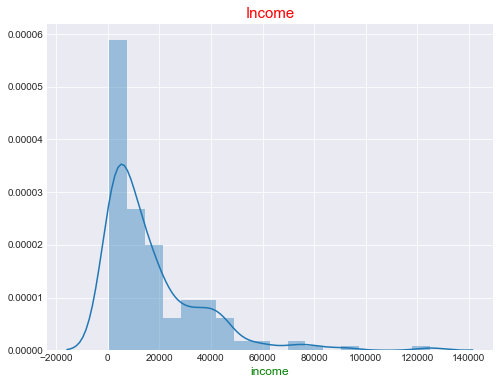

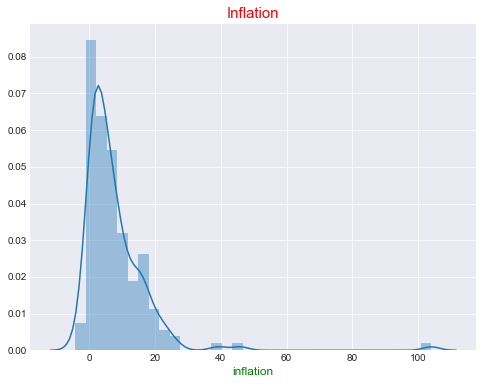

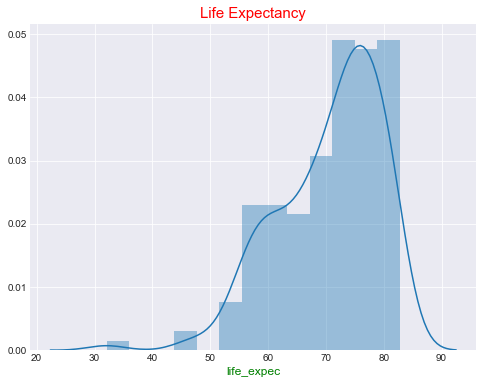

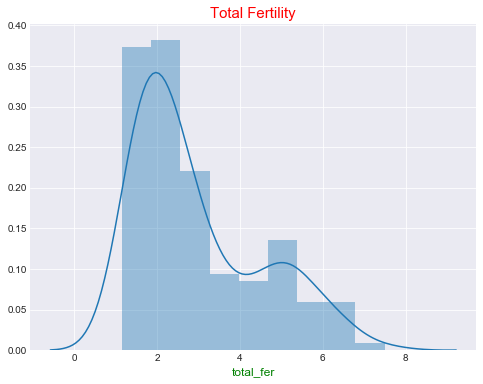

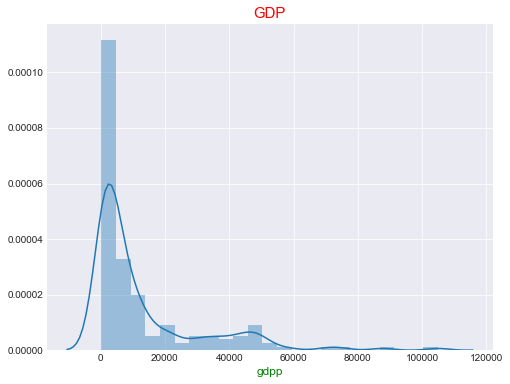

In [10]:
#plotting distplot of all the columns
for column,title in zip(columns,titles):
    plt.figure(figsize=[8,6])
    sns.distplot(dataset[column])
    plt.title(title, color='r', size=15)
    plt.xlabel(column, color='g', size=12)
    plt.show()

From the univariate analysis we can clearly observe maximum peaks as well as smaller peaks in the distribution plots suggesting variance in the data columns. This gives us an idea that the data has range of countries from under-developed to developed countries.

#### Bivariate Analysis

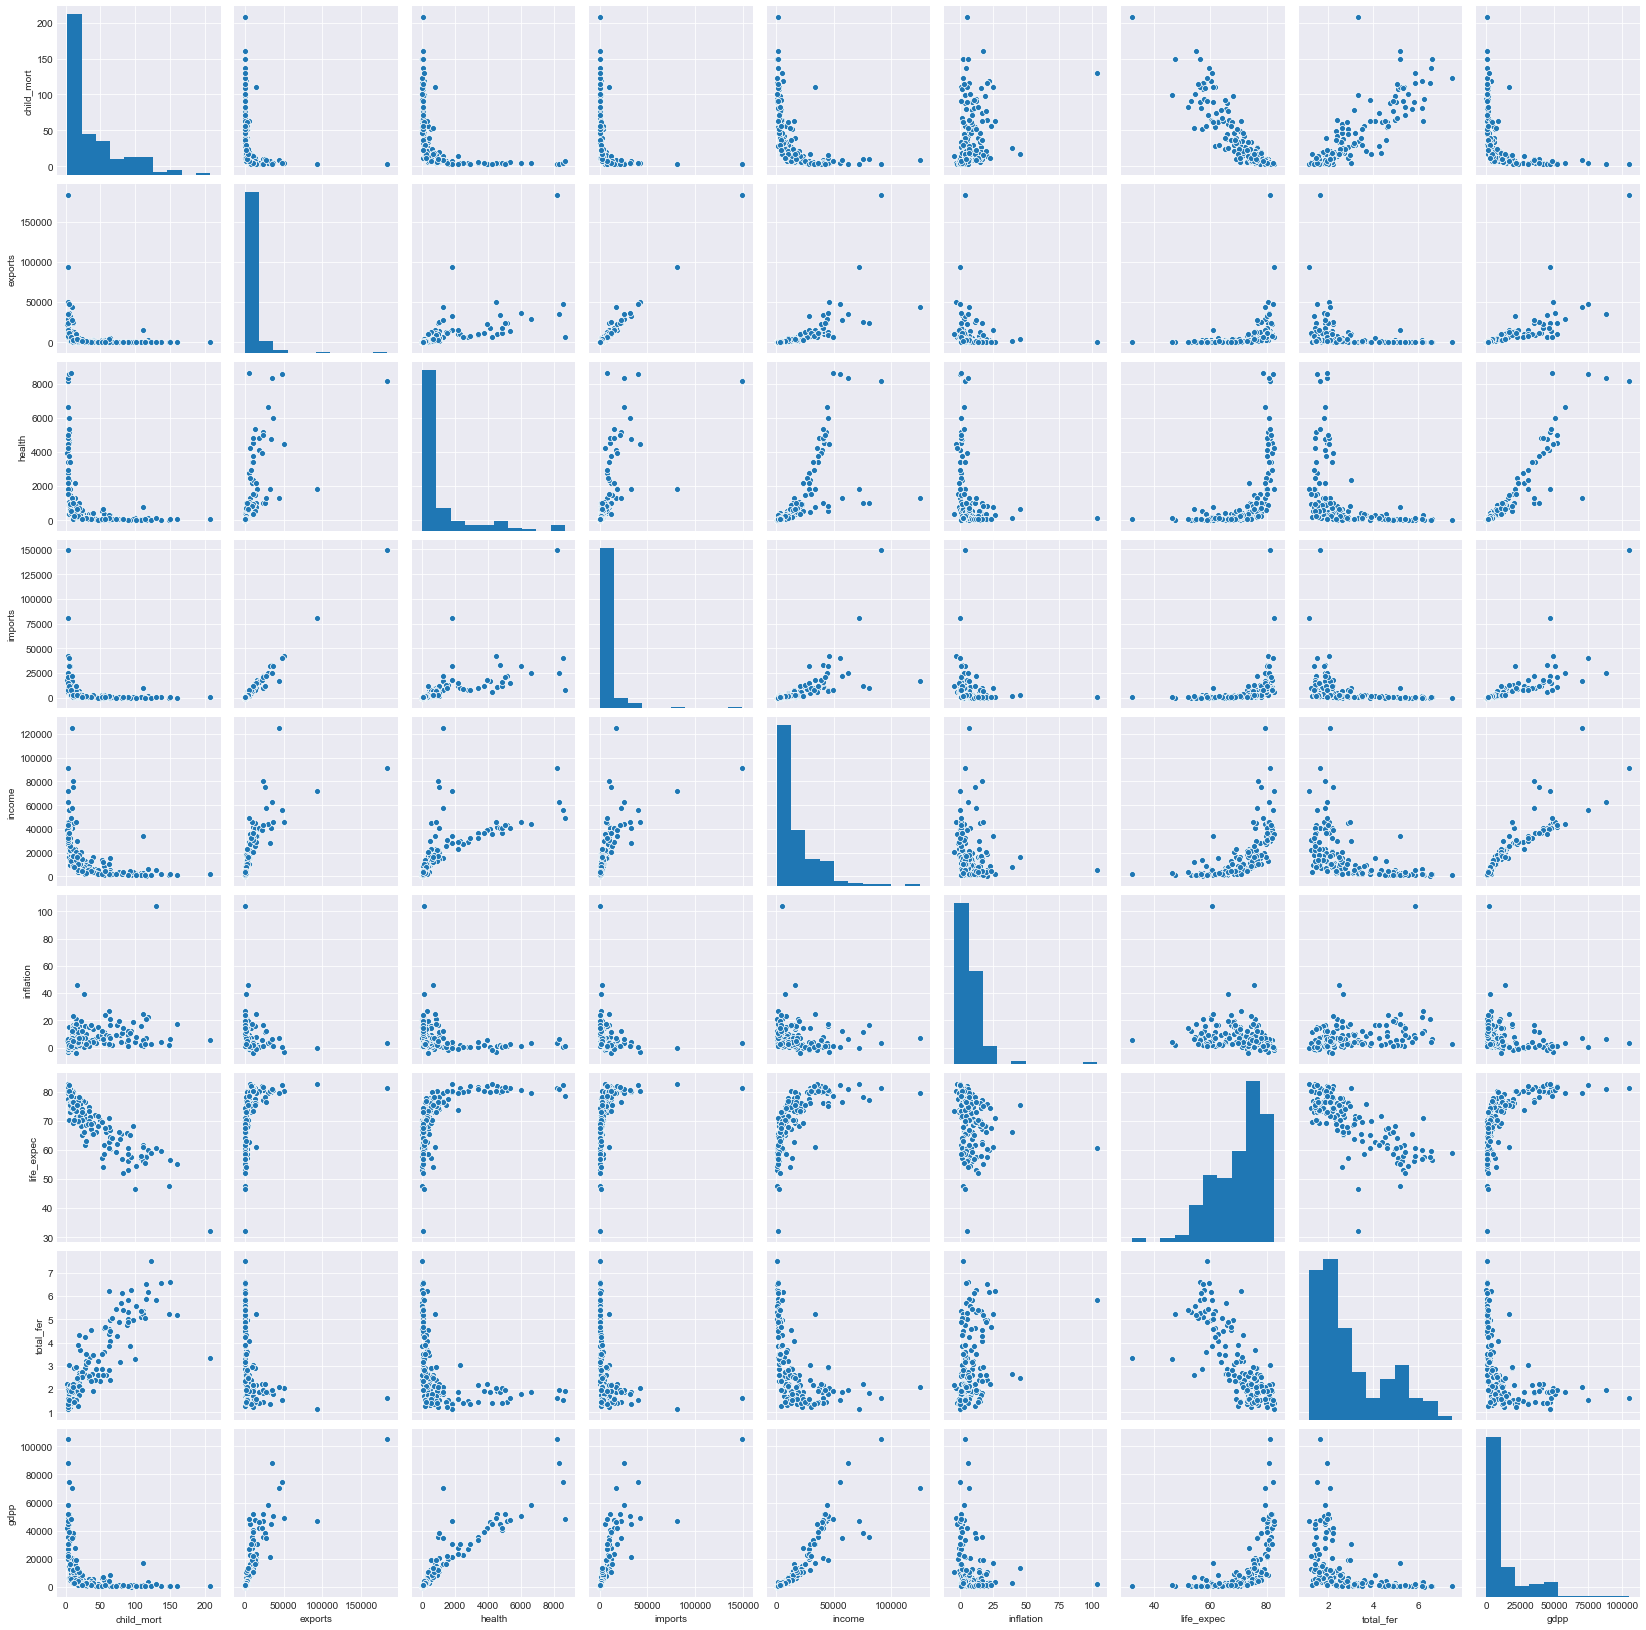

In [11]:
#plotting pairplots for all the columns
sns.pairplot(dataset[columns])
plt.show()

## III. DATA PREPARATION

### Outlier Analysis

In [12]:
#determining outliers in all columns by plotting their boxplots
def plot_boxplot(data):
    for column,title in zip(columns,titles):
        plt.figure(figsize=[8,6])
        sns.boxplot(data[column], orient='v')
        plt.title(title, color='r', size=15)
        plt.ylabel(column, color='g', size=12)
        plt.show()

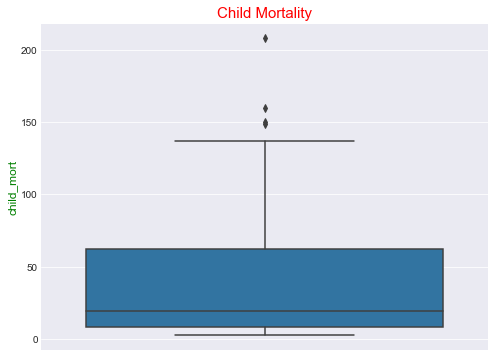

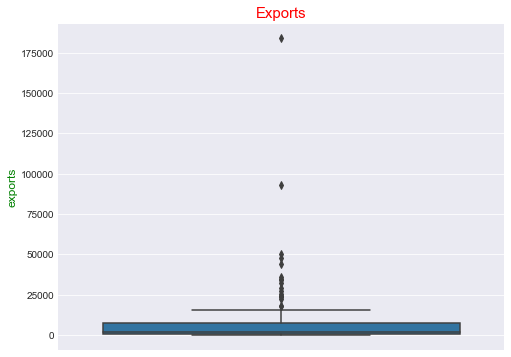

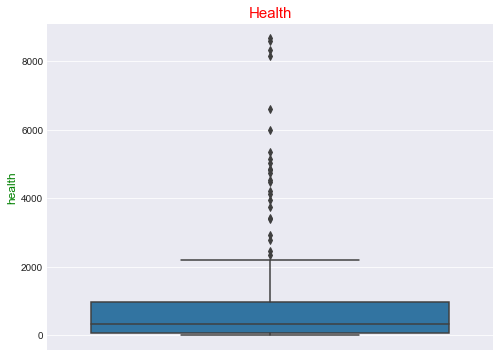

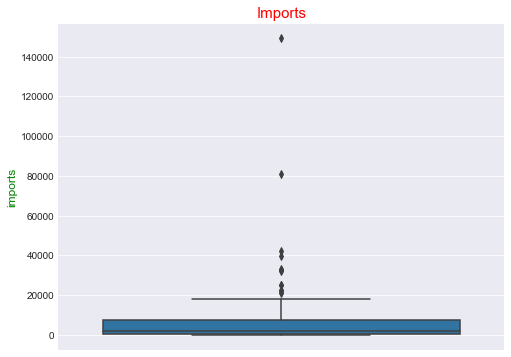

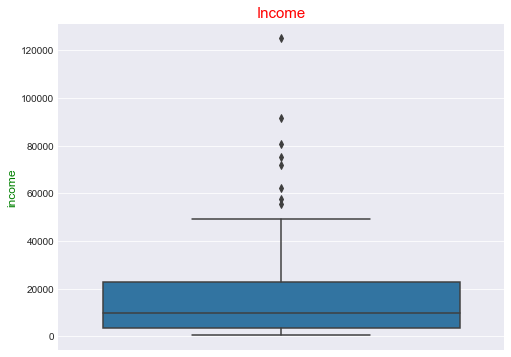

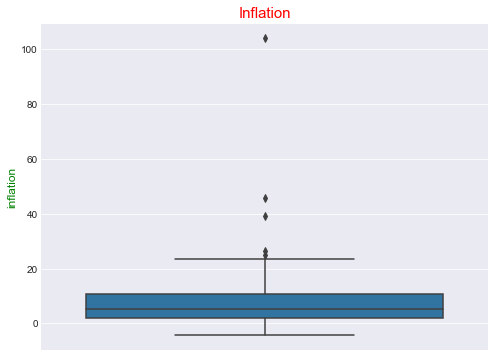

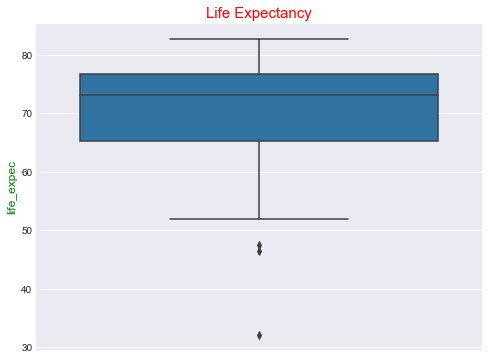

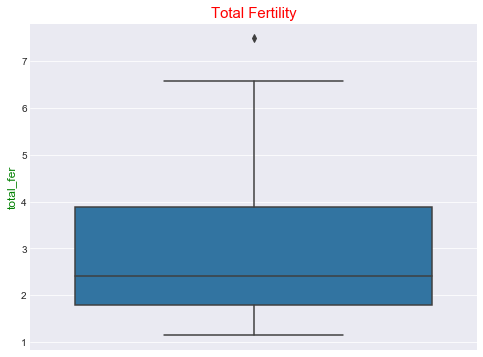

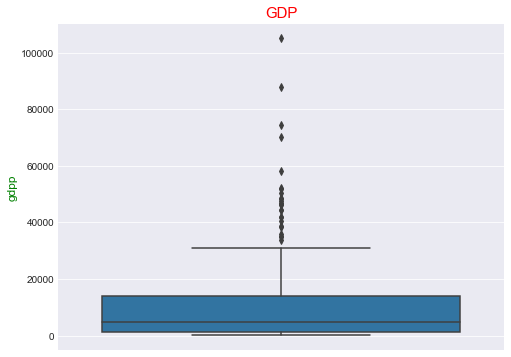

In [13]:
plot_boxplot(dataset)

The boxplots show that the columns in the dataset contains outliers which can hamper our analysis later on. We would like to cap them with different suitable quantile values to deal with them.

In [14]:
columns_1 = ['exports', 'health', 'imports', 'income',
        'life_expec', 'total_fer', 'gdpp']

In [15]:
#soft capping the outlier values to 95th percentile value
for column in columns_1:
    cap = dataset[column].quantile(0.95)
    dataset[column] = dataset[column].apply(lambda x: cap if x > cap else x)

In [16]:
#capping the outlier value of inflation column to 99th percentile value
cap = dataset['inflation'].quantile(0.99)
dataset['inflation'] = dataset['inflation'].apply(lambda x: cap if x>cap else x)

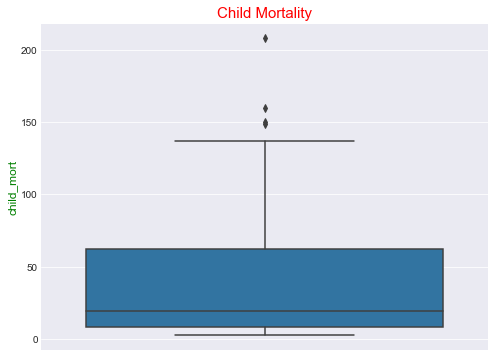

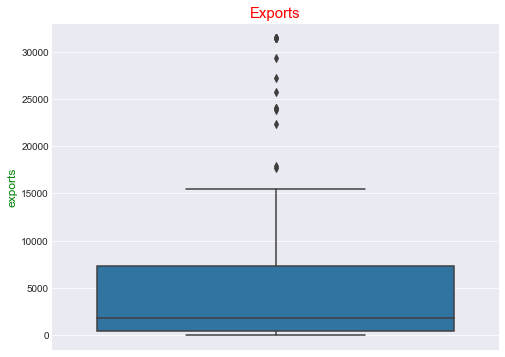

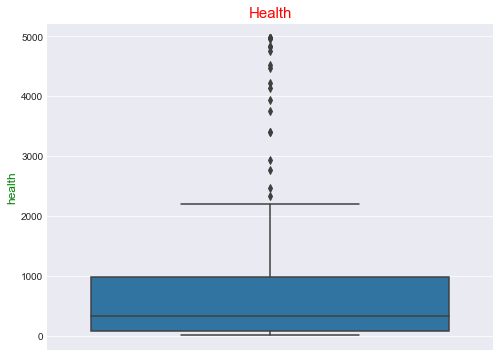

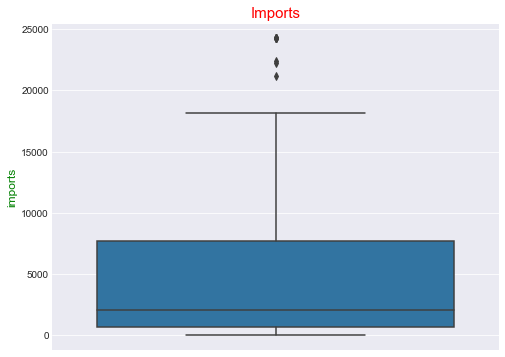

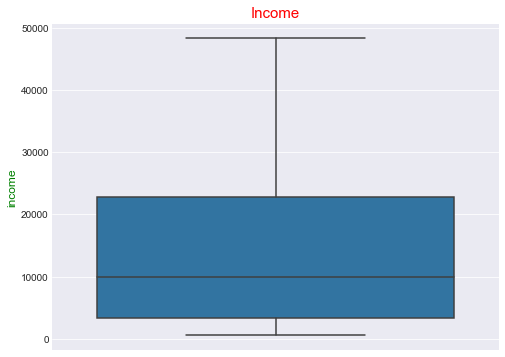

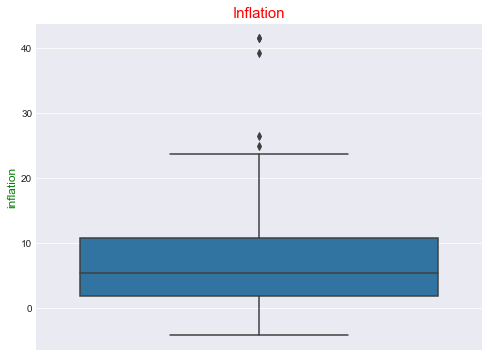

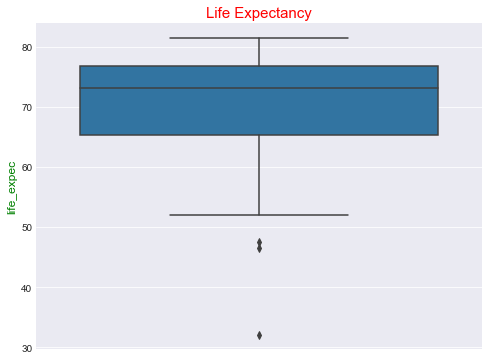

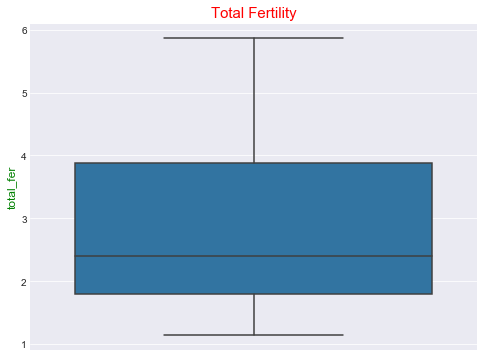

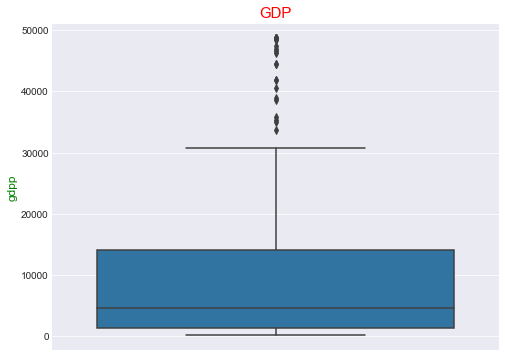

In [17]:
#checking for values after outliers handling
plot_boxplot(dataset)

After capping the values, the boxplots suggests that we can move forward with out analysis. We restrained ourselves to drop columns with outliers so as to include as much data in our analysis as possible.

### Hopkins Test

In [18]:
#hopkins test to determine data suitability for clustering
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [19]:
hopkins(dataset.drop('country', axis=1))

0.8551453617326444

We have achieved a value greater than 0.8 from the Hopkins test which suggests that our dataset is appropriate for clustering.

### Data Scaling

In [20]:
#scaling data using Standardising technique
scaler = StandardScaler()
df = scaler.fit_transform(dataset[columns])

In [21]:
#scaling all the columns except country
scaled_df = pd.DataFrame(df)
scaled_df.columns = columns
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.629435,-0.732729,-0.958349,0.265002,-1.623180,2.016421,-0.757362
1,-0.538949,-0.542172,-0.473489,-0.472182,-0.394006,-0.372075,0.654823,-0.880535,-0.523321
2,-0.272833,-0.475838,-0.530017,-0.560152,-0.192552,1.122161,0.677490,-0.019090,-0.498838
3,2.007808,-0.418960,-0.588935,-0.543087,-0.667360,1.932987,-1.181180,2.044904,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.764618,0.711490,-0.547072,0.013312


In [22]:
scaled_df.shape

(167, 9)

## IV. MODEL BUILDING

## 1. K-Means Clustering

#### Determing suitable K value for K-Means Clustering

##### 1. Silhouette Analysis

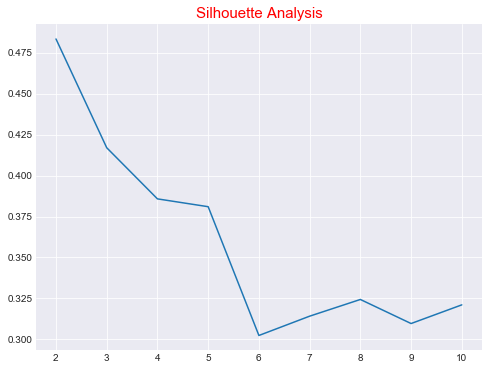

In [23]:
plt.figure(figsize=[8,6])
ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(scaled_df)
    ss.append([k, silhouette_score(scaled_df, kmean.labels_)])

sil = pd.DataFrame(ss)
plt.plot(sil[0], sil[1])
plt.title('Silhouette Analysis', size=15, color='r')
plt.show()

##### 2. Elbow Curve

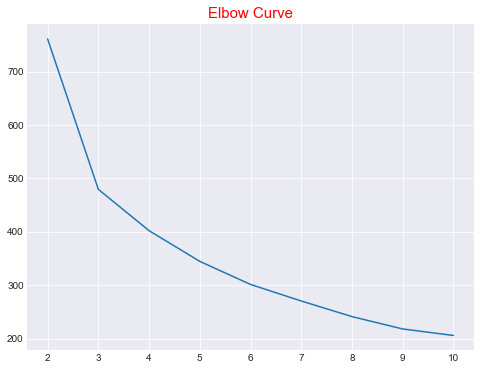

In [24]:
plt.figure(figsize=[8,6])
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(scaled_df)
    ssd.append([k, kmean.inertia_])
    
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])
plt.title('Elbow Curve', size=15, color='r')
plt.show()

From above analysis, we will try to cluster our data using k=3 and k=4 since the methods above suggest these values to be close to optimal in nature

##### Clustering with K = 3

In [25]:
#kmeans using k=3 value
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=0)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [26]:
#labels obtained after clustering
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [27]:
#making a copy of the dataset for kmeans
kmeans3_df = dataset.copy()

In [28]:
#adding kmeans label to the kmeans dataset
kmeans3_df['cluster_id'] = kmeans.labels_
kmeans3_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,2


In [29]:
#checking for values in each cluster id
kmeans3_df.cluster_id.value_counts()

2    82
0    48
1    37
Name: cluster_id, dtype: int64

### Plotting Clusters

In [30]:
#plotting boxplots for all columns v/s cluster id
def plot_cluster_boxplot(data):
    for column, title in zip(columns,titles):
        plt.figure(figsize=[10,6])
        sns.boxplot(x='cluster_id', y=column, data=data, orient='v')
        plt.title(title, color='r', size=15)
        plt.xlabel('Cluster id', color='g', size=12)
        plt.ylabel(title, color='g', size=12)
        plt.show()

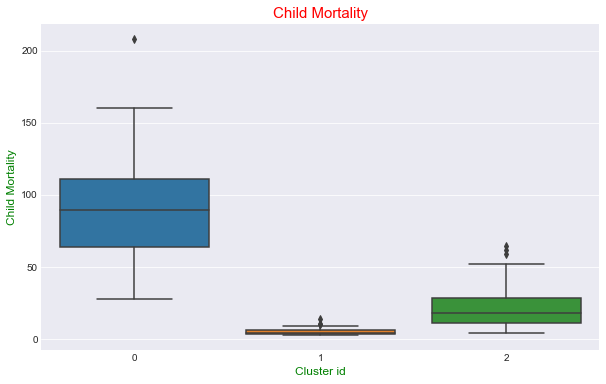

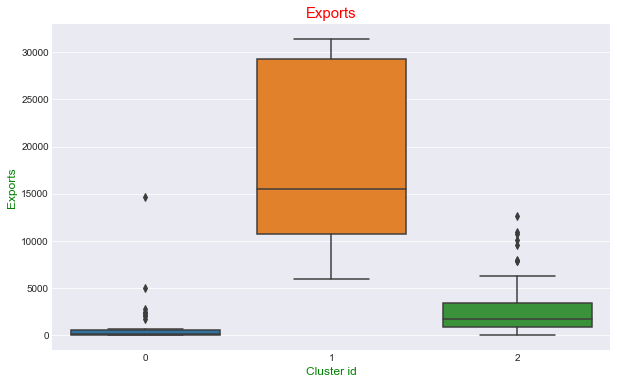

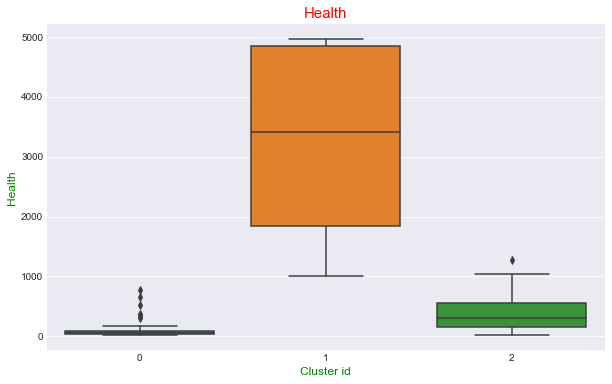

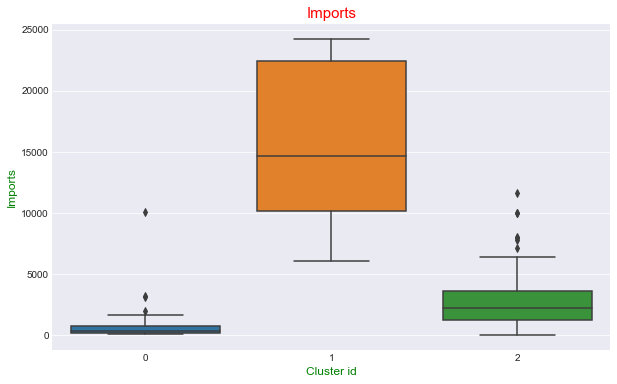

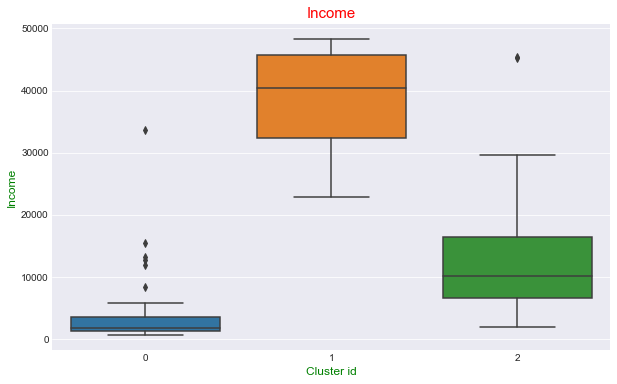

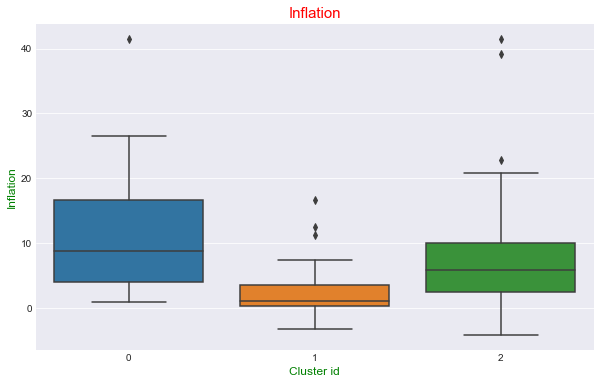

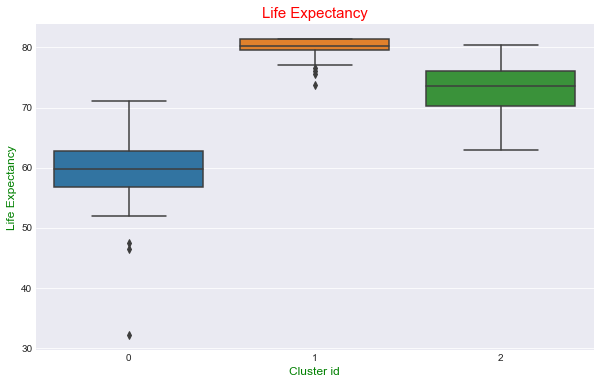

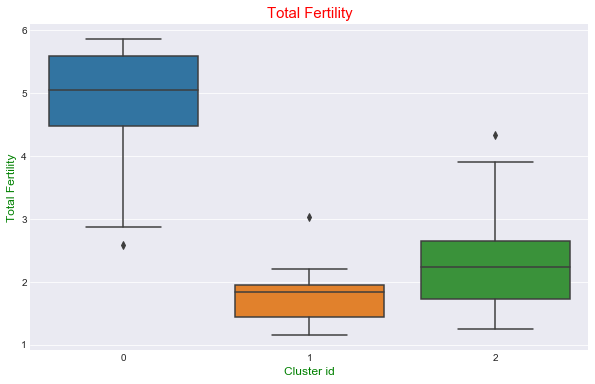

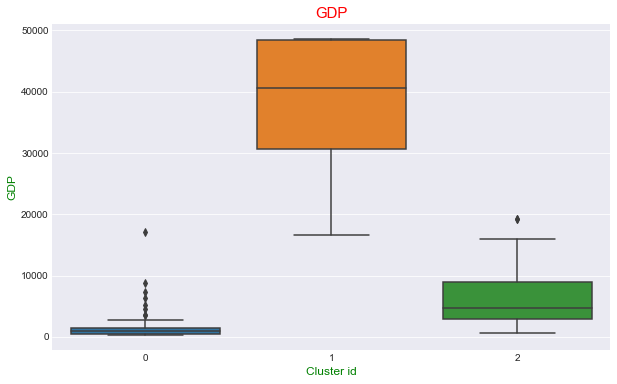

In [31]:
plot_cluster_boxplot(kmeans3_df)

From above boxplots we can divide and profile pur clusters into three categories, namely:
    1. Under-developed countries - 0
    2. Developing countries      - 2
    3. Developed countries       - 1

##### Clustering with K = 4

In [32]:
#kmeans using k=4 value
kmeans = KMeans(n_clusters=4, max_iter=100, random_state=0)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [33]:
#labels obtained after clustering
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 3, 0, 2, 2, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       3, 0, 0, 0, 0, 1, 1, 2, 0, 3, 2, 1, 1, 0, 3, 1, 2, 0, 0, 1, 1, 0,
       1, 2, 3, 0, 0, 0, 1, 3, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       3, 2, 1, 1, 3, 2, 1, 0, 0, 0, 0, 0, 2, 3, 0, 0, 1, 0, 2, 1, 0, 0,
       1, 3, 2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 3, 3, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 3, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [34]:
#making a copy of the dataset for kmeans
kmeans4_df = dataset.copy()

In [35]:
#adding kmeans label to the kmeans dataset
kmeans4_df['cluster_id'] = kmeans.labels_
kmeans4_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,0


In [36]:
#checking for values in each cluster id
kmeans4_df.cluster_id.value_counts()

0    78
1    48
2    24
3    17
Name: cluster_id, dtype: int64

### Plotting Clusters

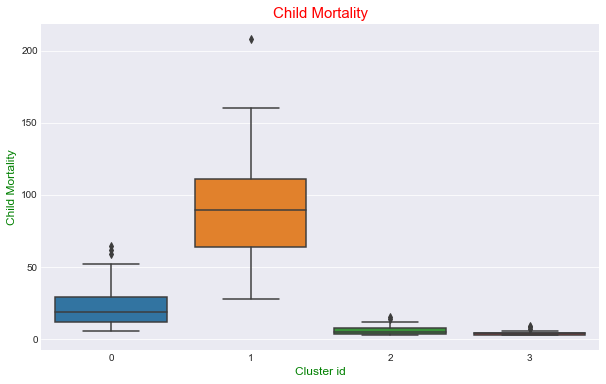

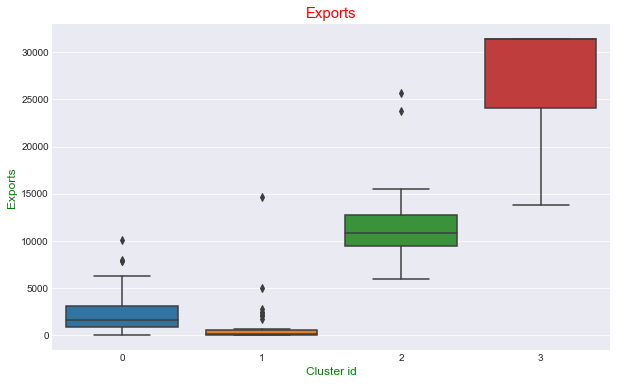

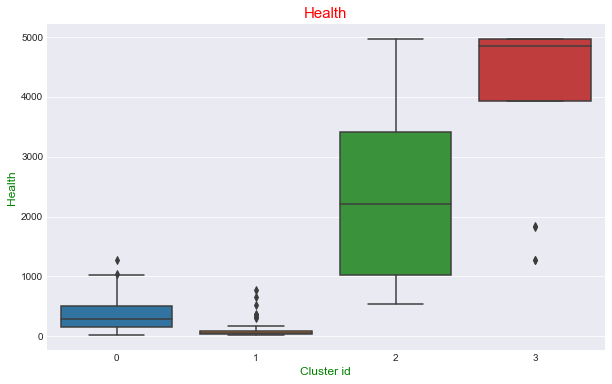

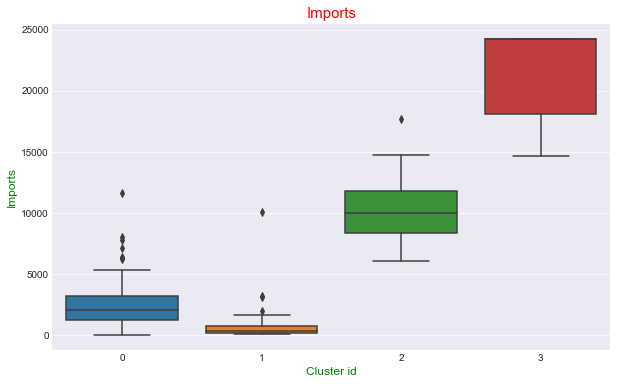

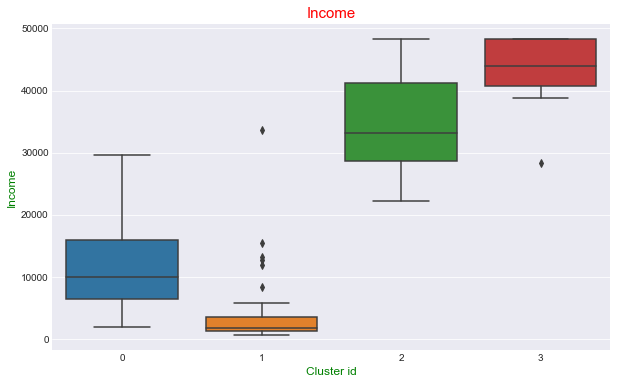

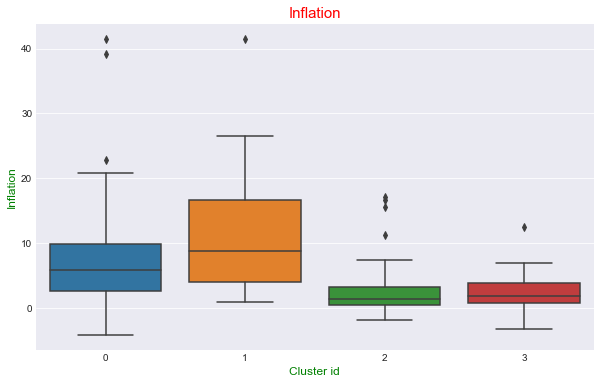

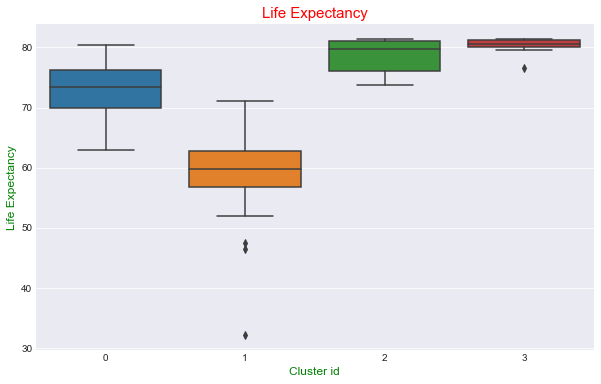

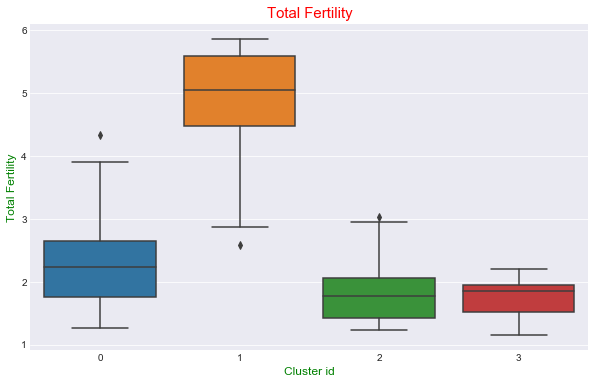

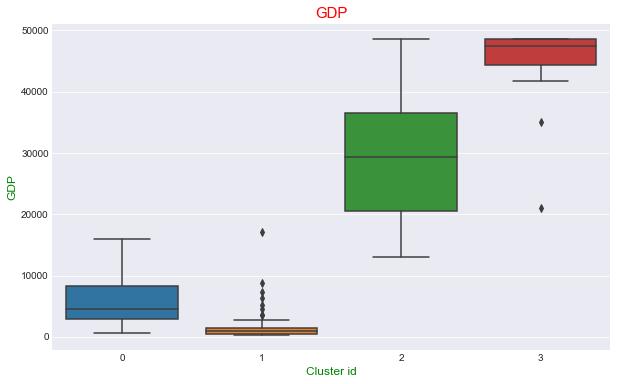

In [37]:
#plotting boxplots for all columns v/s cluster id
plot_cluster_boxplot(kmeans4_df)

From above boxplots we can divide and profile pur clusters into three categories, namely:
    1. Under-developed countries  - 1
    2. Lower Developing countries - 0
    3. Upper Developing countries - 2
    4. Developed countries        - 3

We will proceed with the results obtained from k=4 since the clusters formed are more distinctive and adds more value and information to our analysis.

### Cluster Profiling

#### GDP v/s Income

In [38]:
def plot_clusters(x,y,data,title, xlabel, ylabel):
    plt.figure(figsize=[10,6])
    sns.scatterplot(x=x, y=y, hue='cluster_id', data=data, palette='Set1')
    plt.title(title, size=16, color='r')
    plt.xlabel(xlabel, size=12,color='g')
    plt.ylabel(ylabel ,size=12, color='g')
    plt.show()

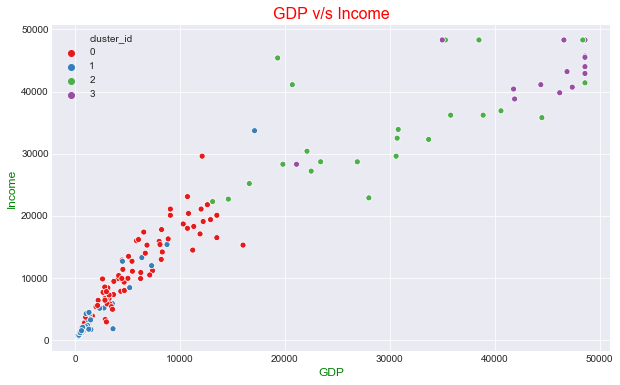

In [39]:
plot_clusters('gdpp','income',kmeans4_df, 'GDP v/s Income', 'GDP', 'Income')

#### GDP v/s Child Mortality

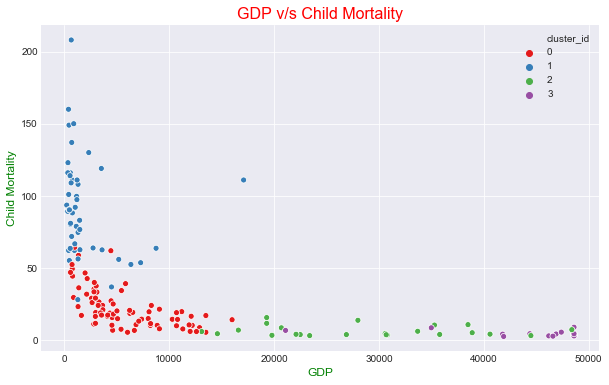

In [40]:
plot_clusters('gdpp','child_mort',kmeans4_df,'GDP v/s Child Mortality','GDP','Child Mortality')

#### Income v/s Child Mortality

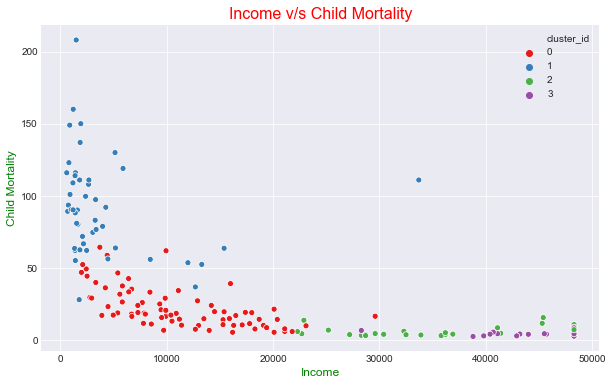

In [41]:
plot_clusters('income','child_mort',kmeans4_df,'Income v/s Child Mortality', 'Income', 'Child Mortality')

### Top 5 countries (K-Means Clustering):

In [42]:
#extracting countries with cluster label=1
under_developed = kmeans4_df[kmeans4_df.cluster_id == 1]

In [43]:
#sorting values by GDP, Income and Child Mortality and displaying top 5 countries
under_developed.sort_values(by=['gdpp','income','child_mort'], ascending=[True, True, False]).head().reset_index(drop=True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,5.861,231.0,1
1,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.020,327.0,1
2,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,5.861,334.0,1
3,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,5.861,348.0,1
4,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.200,399.0,1


We have obtained top 5 under deveoped countries that are in dire need of aid from HELP International on the basis of a comparison between 3 columns, namely, GDP, Income and Child Mortality from our K-Mean Clustering analysis.

We will now move to Hierarchical Clustering to analyse and form clusters using this techinque and to observe whether there is some change in the obtained results or not.

## 2. Hierarchical Clustering

In [44]:
#using scaled df as obtained after standardising the dataset
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.629435,-0.732729,-0.958349,0.265002,-1.623180,2.016421,-0.757362
1,-0.538949,-0.542172,-0.473489,-0.472182,-0.394006,-0.372075,0.654823,-0.880535,-0.523321
2,-0.272833,-0.475838,-0.530017,-0.560152,-0.192552,1.122161,0.677490,-0.019090,-0.498838
3,2.007808,-0.418960,-0.588935,-0.543087,-0.667360,1.932987,-1.181180,2.044904,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.764618,0.711490,-0.547072,0.013312


#### Single Linkage

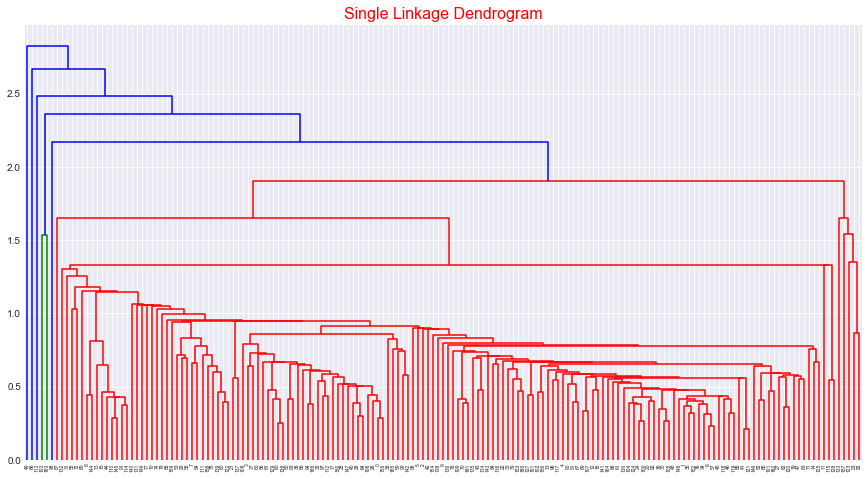

In [45]:
#using single method for linkage and plotting dendrograms
plt.figure(figsize=[15,8])
mergings_s = linkage(scaled_df, method='single', metric='euclidean')
dendrogram(mergings_s)
plt.title('Single Linkage Dendrogram', size=16, color='r')
plt.show()

#### Complete Linkage

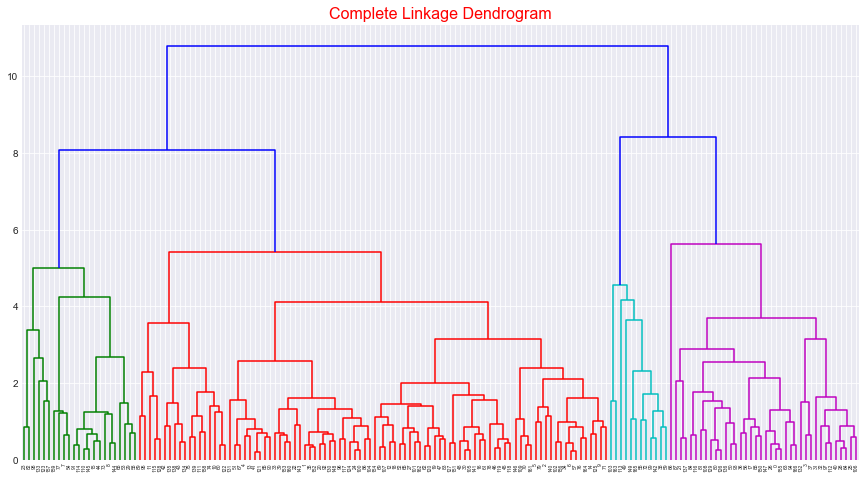

In [46]:
#using complete method for linkage and plotting dendrograms
plt.figure(figsize=[15,8])
mergings_c = linkage(scaled_df, method='complete', metric='euclidean')
dendrogram(mergings_c)
plt.title('Complete Linkage Dendrogram', size=16, color='r')
plt.show()

We can clearly observe that 'complete' linkage method did a much better job in forming distinctive clusters than 'single' linkage method. Hence, we will use mergings obtained from complete linkage method to move forward with our analysis and cluster forming.

We have decided to form 4 clusters after we cut our dendrogram at value 6. This number looks informative as the next possible number for cluster forming would be 7 if we cut dendrogram at value 5, which will mean that we will end up with too many clusters and lesser information.

In [47]:
#extracting cluster labels from the tree using cut tree
cluster_labels = cut_tree(mergings_c, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 3, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 3, 0, 1, 1, 2, 2, 3, 0, 1, 2, 3, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 3, 1, 1, 1, 3, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 3, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 3, 1, 2, 2, 1, 0, 1, 3, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 3, 1, 3, 0])

In [48]:
#making a copy of dataset for hierarchy
hier_df = dataset.copy()

In [49]:
#adding cluster label column in hierarchy df
hier_df['cluster_id'] = cluster_labels
hier_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,1


In [50]:
#counting values of cluster id
hier_df.cluster_id.value_counts()

1    94
0    38
2    23
3    12
Name: cluster_id, dtype: int64

### Plotting Clusters

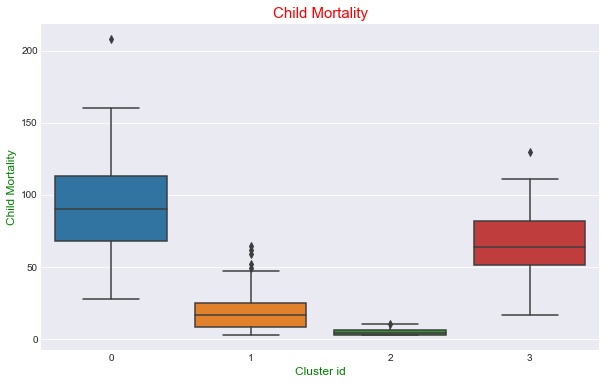

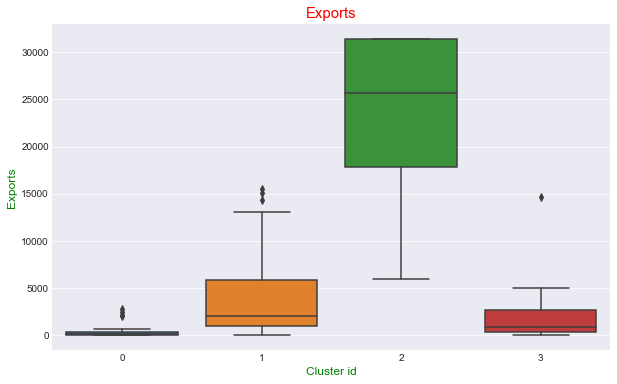

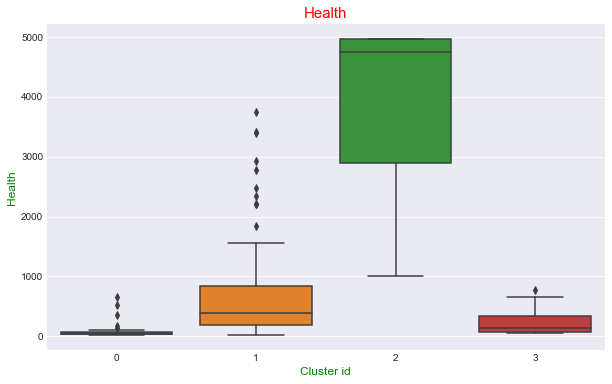

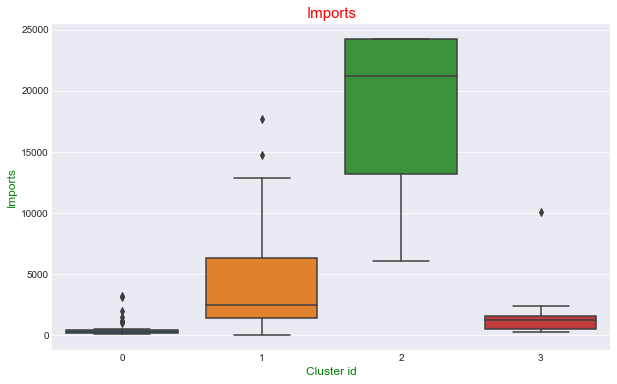

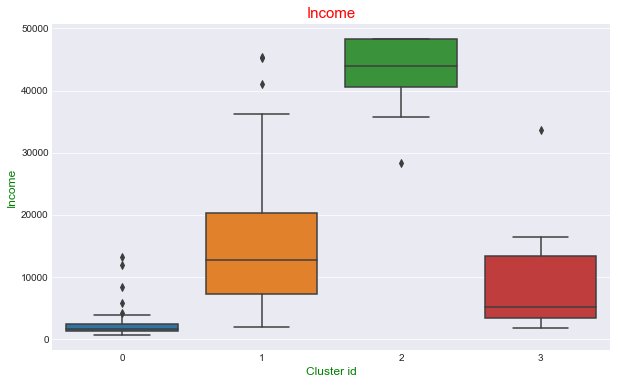

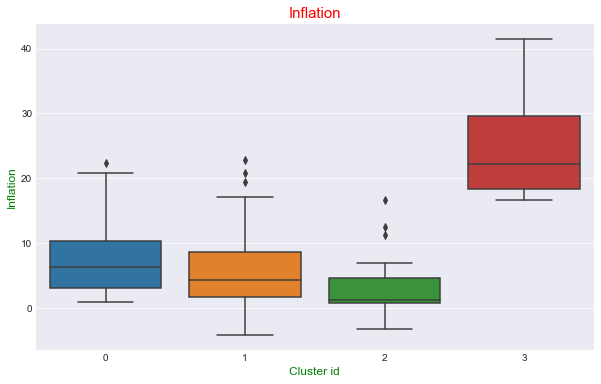

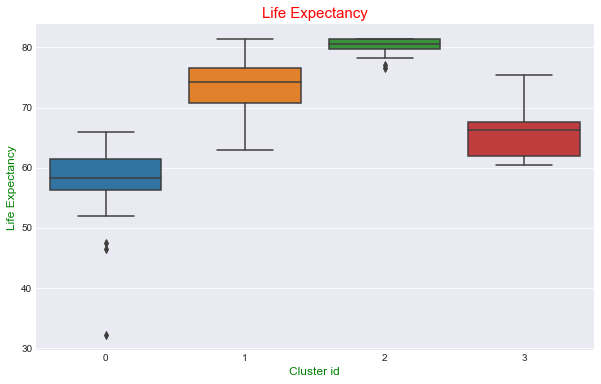

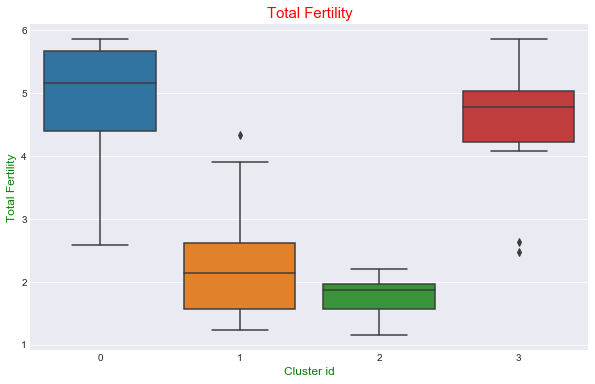

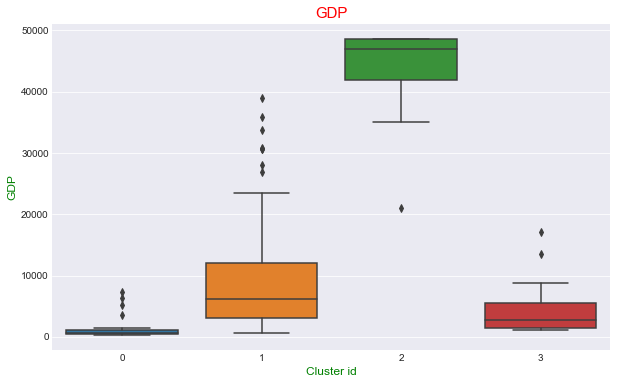

In [51]:
#plotting boxplots for all columns v/s cluster id
plot_cluster_boxplot(hier_df)

From above boxplots we can divide and profile pur clusters into three categories, namely:
    1. Under-developed countries  - 0
    2. Lower Developing countries - 3
    3. Upper Developing countries - 1
    4. Developed countries        - 2

### Cluster Profiling

#### GDP vs Income

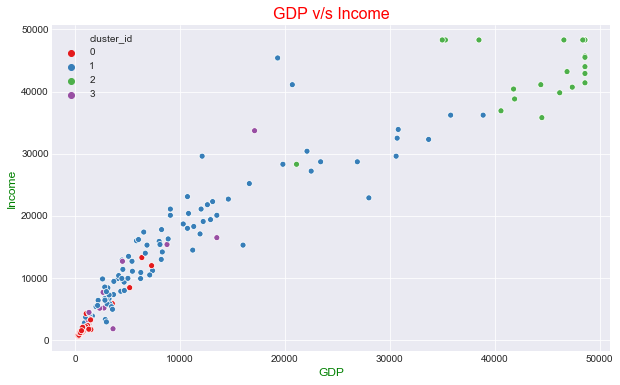

In [52]:
plot_clusters('gdpp','income',hier_df,'GDP v/s Income', 'GDP', 'Income')

#### GDP vs Child Mortality

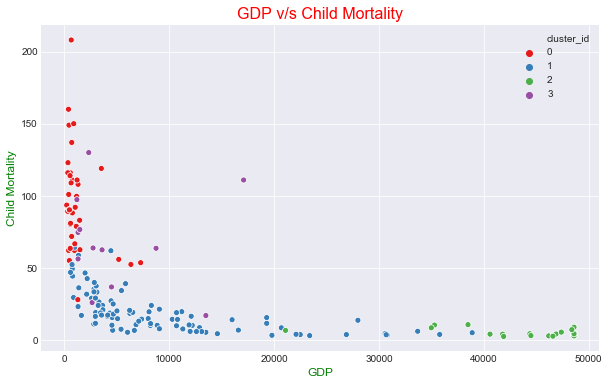

In [53]:
plot_clusters('gdpp','child_mort',hier_df,'GDP v/s Child Mortality', 'GDP', 'Child Mortality')

#### Child Mortality vs Income

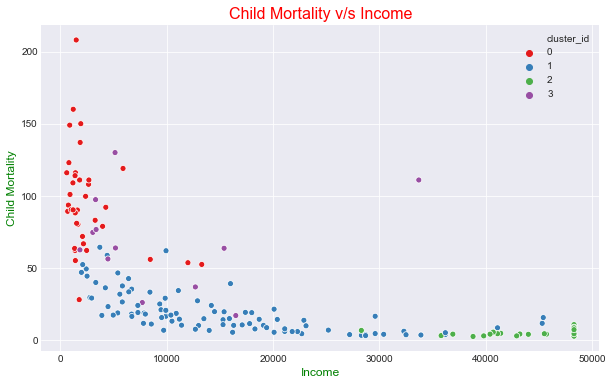

In [54]:
plot_clusters('income','child_mort', hier_df,'Child Mortality v/s Income', 'Income', 'Child Mortality')

### Top 5 countries (Hierarchical Clustering):

In [55]:
#extracting countries with cluster id = 0
under_developed_hier = hier_df[hier_df.cluster_id == 0]

In [56]:
##sorting values by GDP, Income and Child Mortality and displaying top 5 countries
top5_underdeveloped = under_developed_hier.sort_values(by=['gdpp','income','child_mort'], ascending=[True, True, False]).head().reset_index(drop=True)

In [57]:
top5_underdeveloped

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,5.861,231.0,0
1,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.020,327.0,0
2,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,5.861,334.0,0
3,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,5.861,348.0,0
4,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.200,399.0,0


We have obtained the same top 5 under deveoped countries that are in dire need of aid from HELP International on the basis of a comparison between 3 columns, namely, GDP, Income and Child Mortality from our Hierarchical Clustering analysis as we obtained from the K-Means Clustering analysis.

**Note** : The top 5 countries for aid will depend on how we sort our values according to the columns GDP, Child Mortality and Income.

In our case, we have taken sorting in the following order:
    1. First, sorted on the basis of GDP
    2. Then sorted on the basis of Income
    3. Then sorted on the basis of Child Mortality

### Total Countries (K-means + Hierarchical) 

In [58]:
top5_underdeveloped_countries = pd.DataFrame(top5_underdeveloped['country'])
top5_underdeveloped_countries.columns = ['Country']

In [59]:
set1 = set(under_developed['country'])
set2 = set(under_developed_hier['country'])
underdeveloped_countries = set1.intersection(set2)

In [60]:
len(underdeveloped_countries)

38

In [61]:
underdeveloped_countries = pd.DataFrame(underdeveloped_countries)
underdeveloped_countries.columns = ['Country']

### Recommendations

The recommendations are based on both the analysis obtained from K-Means clustering as well as Hierarchical clustering

#### 1. Top 5 Under-Developed Countries:

The following is the list of top 5 most under-developed countries that are in dire need of aid from HELP International:

In [62]:
top5_underdeveloped_countries

,Country
0,Burundi
1,Liberia
2,"Congo, Dem. Rep."
3,Niger
4,Sierra Leone


#### 2. Total Under-Developed Countries:

The following is the list of all the under-developed countries that are in dire need of aid from HELP International:

In [63]:
underdeveloped_countries

,Country
0,Uganda
1,Burundi
2,South Africa
3,Kenya
4,Chad
5,Botswana
6,Mozambique
7,Togo
8,Eritrea
9,Zambia
